In [319]:
import pandas as pd
import numpy as np
import pymysql                        
from sqlalchemy import create_engine  
from getpass import getpass  
import matplotlib.pyplot as plt
import seaborn as sns


In [320]:
customer_df=pd.read_csv(r'C:\Users\sorig\IH-Labs\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

In [321]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [322]:
customer_df.shape

(9134, 24)

In [323]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [324]:
customer_df.describe() .T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [325]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [326]:
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df.columns 

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [327]:
customer_df.columns = customer_df.columns.str.lower()
customer_df.columns 

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [328]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"])
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [329]:
numerical_df= customer_df.select_dtypes(include = np.number)
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [330]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [331]:
continuous_df = numerical_df[['customer_lifetime_value','income','total_claim_amount']].copy()

discrete_df = numerical_df.drop(['customer_lifetime_value','income','total_claim_amount'], axis = 1).copy()

In [332]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [333]:
discrete_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


C:\Users\sorig\AppData\Local\Temp\ipykernel_10068\1019909460.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=customer_df.corr()


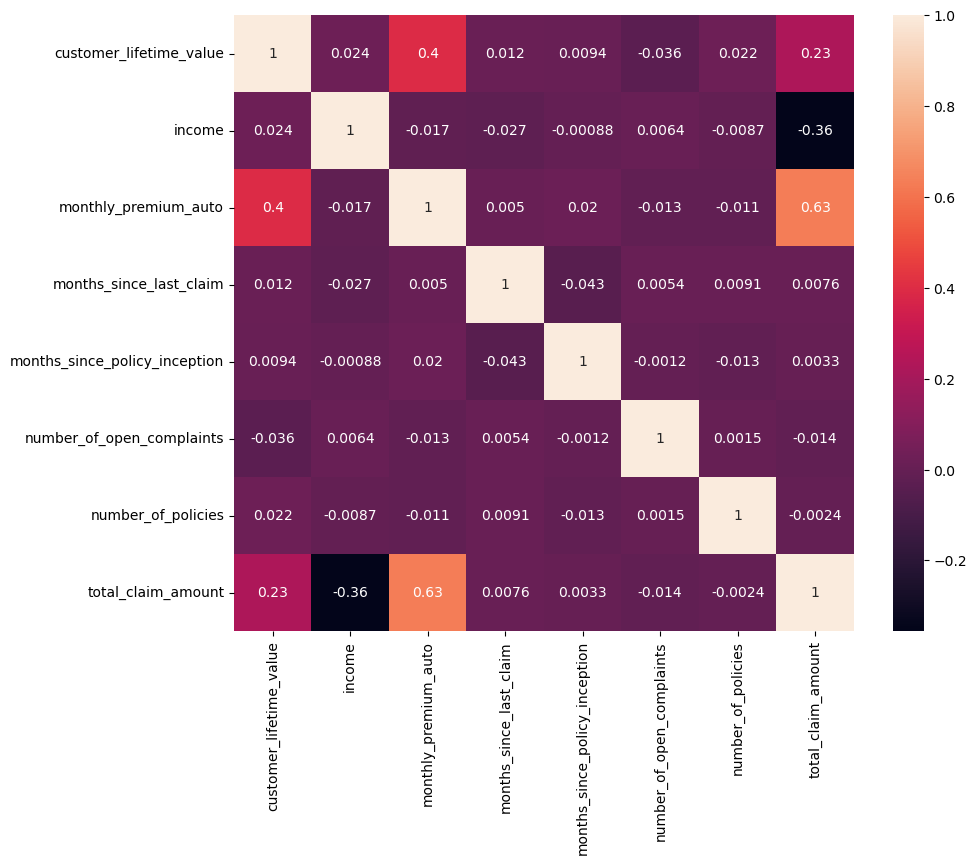

In [334]:
corr_matrix=customer_df.corr() 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


In [335]:
#  there is a high correlation between our target and monthly_premium_auto

<Axes: xlabel='monthly_premium_auto', ylabel='Count'>

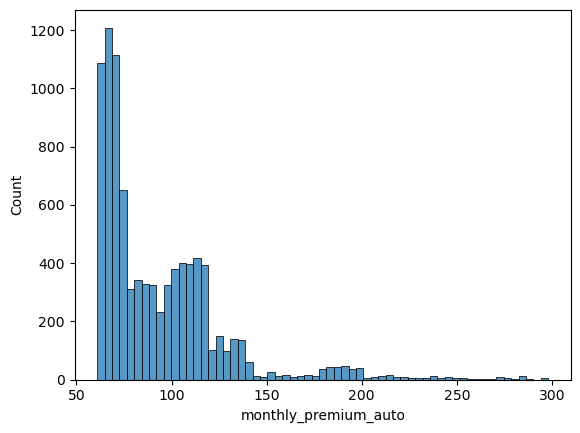

In [336]:
sns.histplot(data=discrete_df, x='monthly_premium_auto')  

<Axes: xlabel='months_since_last_claim', ylabel='Count'>

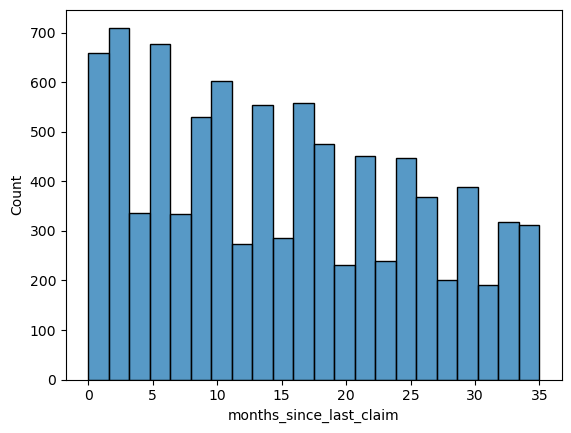

In [337]:
sns.histplot(data=discrete_df, x='months_since_last_claim')  

<Axes: xlabel='months_since_policy_inception', ylabel='Count'>

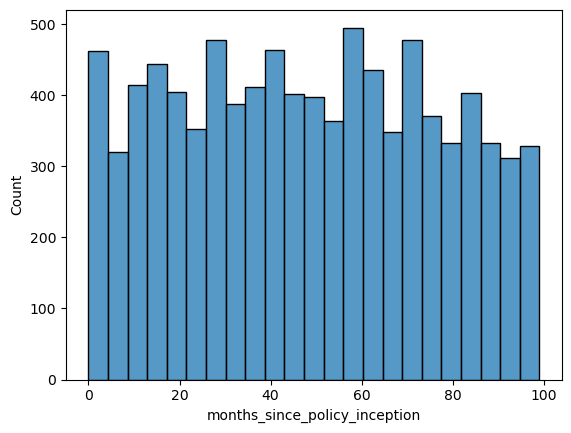

In [338]:
sns.histplot(data=discrete_df, x='months_since_policy_inception')  

<Axes: xlabel='number_of_open_complaints', ylabel='Count'>

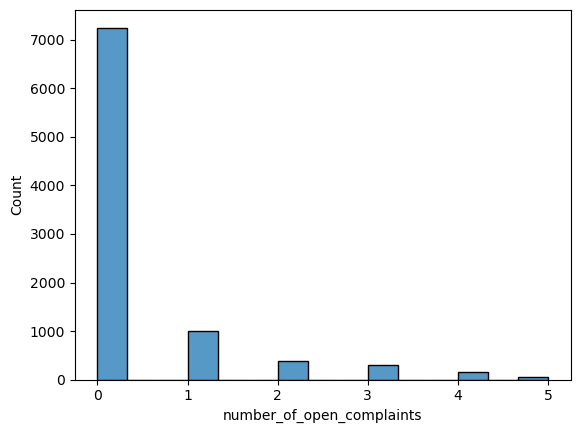

In [339]:
sns.histplot(data=discrete_df, x='number_of_open_complaints')  


<Axes: xlabel='number_of_policies', ylabel='Count'>

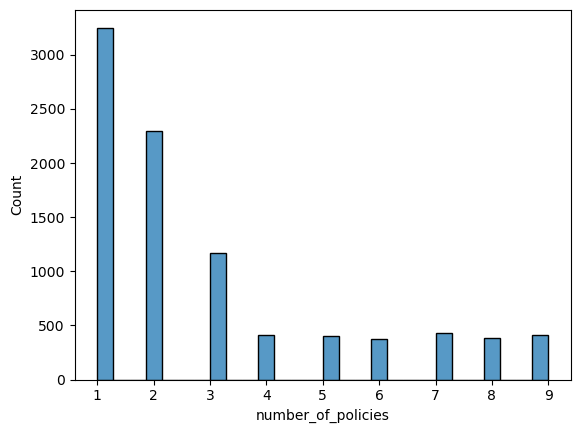

In [340]:
sns.histplot(data=discrete_df, x='number_of_policies')  

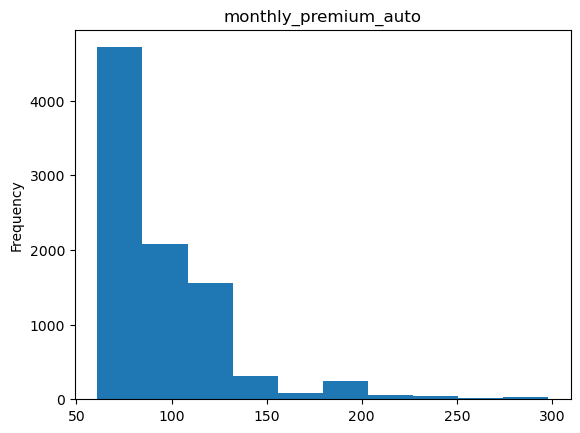

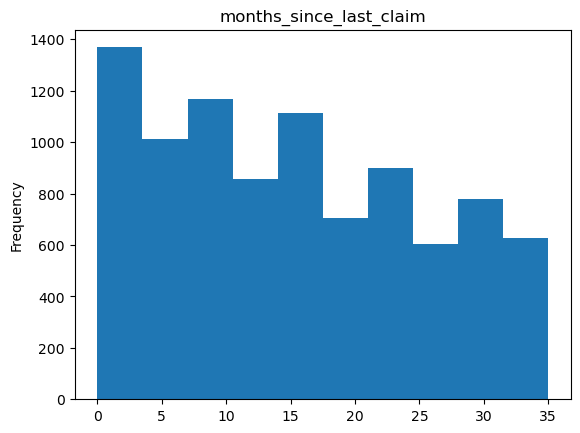

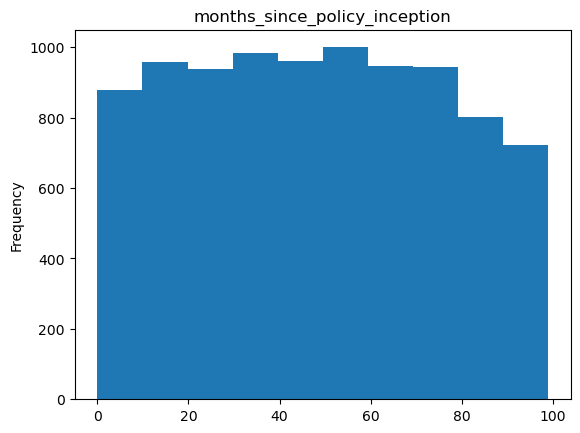

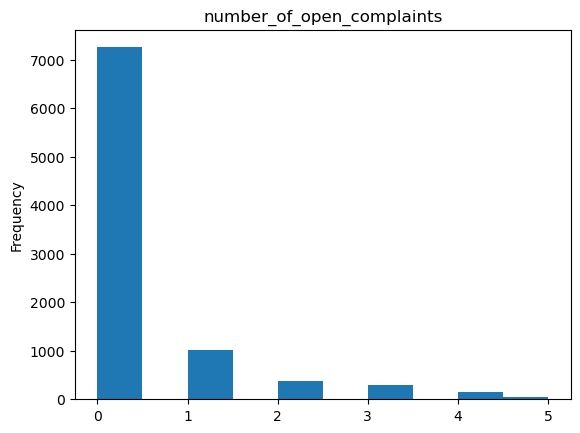

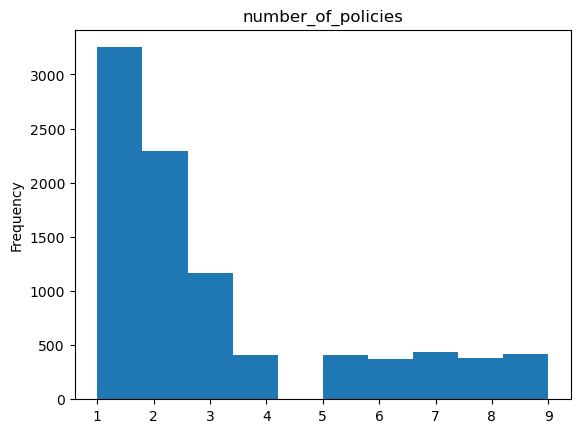

In [341]:
for col in discrete_df.columns:
    discrete_df[col].plot(kind='hist')
    plt.title(col)
    plt.show()

In [342]:
# # we have a right skewed distribution for monthly_premium_auto , more of a uniform one for months_since_policy_inception

In [343]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


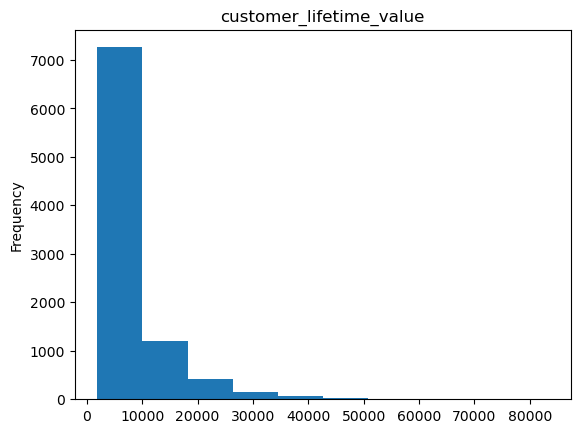

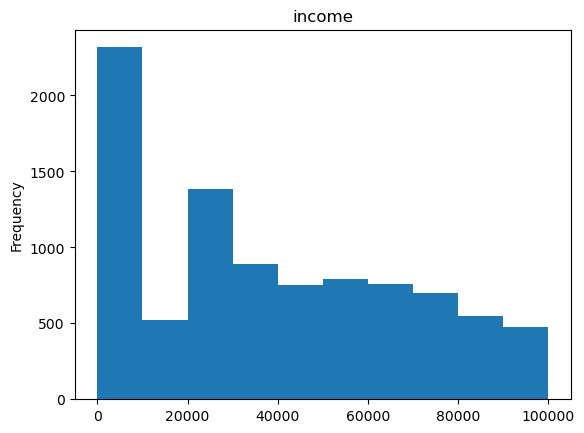

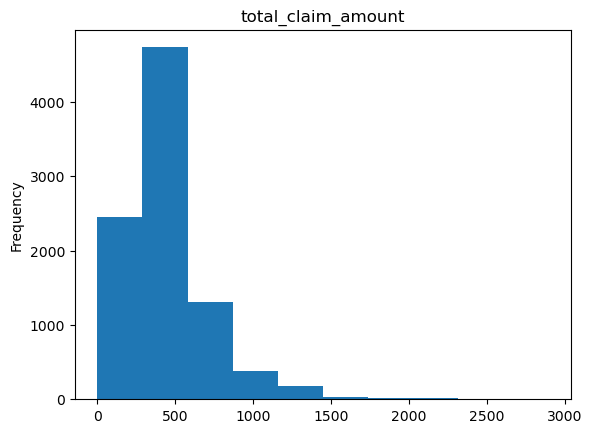

In [344]:
for col in continuous_df.columns:
    continuous_df[col].plot(kind='hist')
    plt.title(col)
    plt.show()

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'total_claim_amount'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

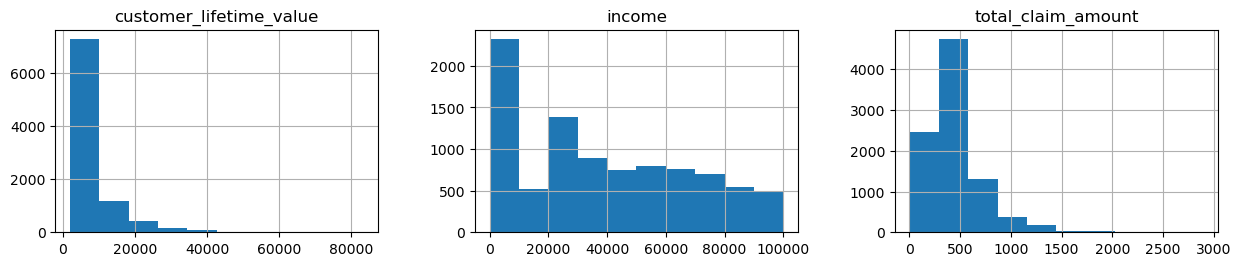

In [345]:
continuous_df.hist(figsize=(15,30),layout=(9,3))

In [346]:
# we have a right skewed distribution for costumer_liefetime_value 

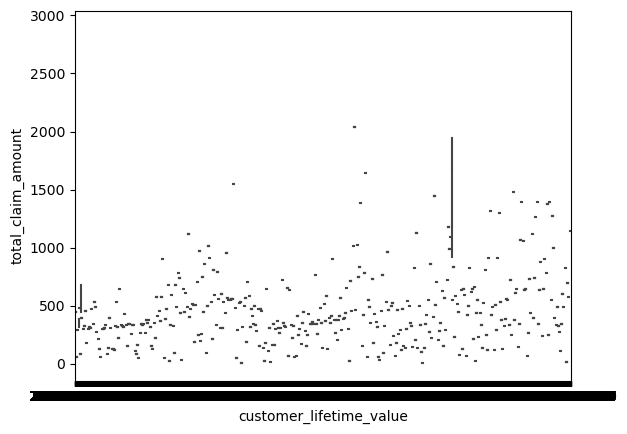

In [347]:
sns.boxplot(x = 'customer_lifetime_value',y='total_claim_amount', data= continuous_df)
plt.show()


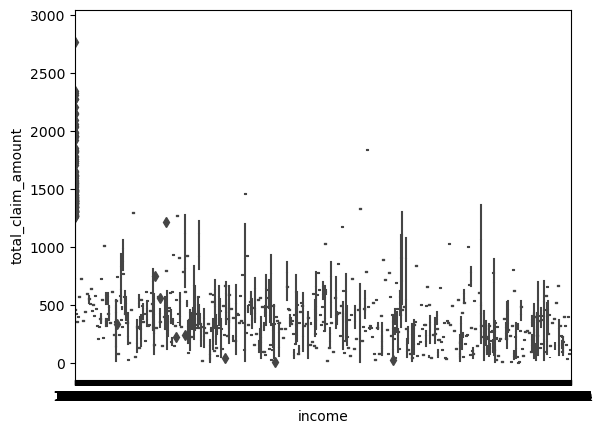

In [348]:
sns.boxplot(x = 'income',y='total_claim_amount', data= continuous_df)
plt.show()

In [349]:
continuous_df.describe() .T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


<Axes: >

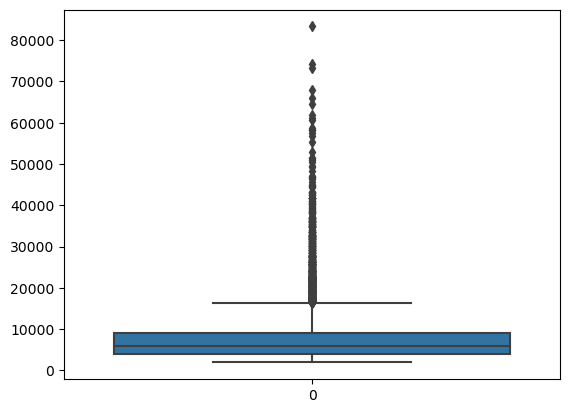

In [350]:
sns.boxplot(data=continuous_df['customer_lifetime_value'])

<Axes: >

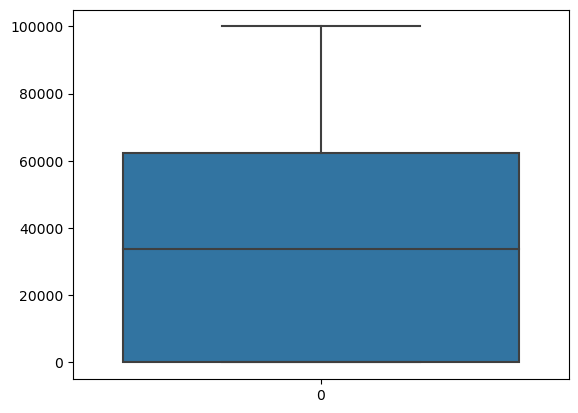

In [351]:
sns.boxplot(data=continuous_df['income'])

In [352]:
col2 = continuous_df['customer_lifetime_value']
count = col2[col2>20000].count()
count

575

In [353]:
# there are some (very) high values in "customer_lifetime_value" , but with 575 over the upper whisker, i don't thing eliminating the outliers is a good idea

In [354]:
numerical_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [355]:
numerical_df.to_csv(r'C:\Users\sorig\IH-Labs\lab-cleaning-numerical-data\files_for_lab\numerical_df.csv' , index=False)

In [356]:
categorical_df = customer_df.select_dtypes(object)

In [357]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [358]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [359]:
categorical_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [360]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [361]:
print(categorical_df.nunique())

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64


In [362]:
# the customer id is alpha-numeric, but we probably could drop that column later. the other one is the "policy". we can leave it like this , we are going to encode it.

In [363]:
# we can drop policy_type as we have those values in policy

In [364]:
categorical_df['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [365]:
categorical_df['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [366]:
categorical_df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [367]:
# we are going to encode 'education' and reduce the number of values by grouping them

In [368]:
categorical_df["coverage"] = categorical_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [369]:
categorical_df['education'] = categorical_df['education'].map({'Bachelor':'0.5', 'College':'0.5', 'Master':'1', 'High School or Below':'0', 'Doctor':'1'})  

In [370]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,0,0.5,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,1,0.5,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,2,0.5,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,0,0.5,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,0,0.5,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [371]:
categorical_df = categorical_df.drop(['policy_type'], axis =1)

In [372]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,0,0.5,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,1,0.5,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,2,0.5,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,0,0.5,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,0,0.5,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [373]:
categorical_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [374]:
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].map({'Two-Door Car':'0', 'Four-Door Car':'0', 'SUV':'0.5', 'Luxury SUV':'1', 'Sports Car':'0.5', 'Luxury Car':'1'})  

In [375]:
categorical_df.to_csv(r'C:\Users\sorig\IH-Labs\categorical.csv', index=False) 

In [376]:
categorical_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [377]:
categorical_df['employmentstatus'] = categorical_df['employmentstatus'].map({'Employed':'1', 'Unemployed':'0', 'Medical Leave':'1', 'Disabled':'0', 'Retired':'0'})  

In [378]:
categorical_df['location_code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [379]:
categorical_df['location_code'] = categorical_df['location_code'].map({'Suburban':'0.5', 'Rural':'0', 'Urban':'1'})  

In [380]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,0,0.5,1,F,0.5,Married,Corporate L3,Offer1,Agent,0,Medsize
1,QZ44356,Arizona,No,1,0.5,0,F,0.5,Single,Personal L3,Offer3,Agent,0,Medsize
2,AI49188,Nevada,No,2,0.5,1,F,0.5,Married,Personal L3,Offer1,Agent,0,Medsize
3,WW63253,California,No,0,0.5,0,M,0.5,Married,Corporate L2,Offer1,Call Center,0.5,Medsize
4,HB64268,Washington,No,0,0.5,1,M,0,Single,Personal L1,Offer1,Agent,0,Medsize


In [381]:
categorical_df['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [382]:
categorical_df['vehicle_size'] = categorical_df['vehicle_size'].map({'Small':'0', 'Medsize':'0.5', 'Large':'1'})  

In [383]:
categorical_df = categorical_df.drop(['customer'], axis=1)

In [384]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0,0.5,1,F,0.5,Married,Corporate L3,Offer1,Agent,0,0.5
1,Arizona,No,1,0.5,0,F,0.5,Single,Personal L3,Offer3,Agent,0,0.5
2,Nevada,No,2,0.5,1,F,0.5,Married,Personal L3,Offer1,Agent,0,0.5
3,California,No,0,0.5,0,M,0.5,Married,Corporate L2,Offer1,Call Center,0.5,0.5
4,Washington,No,0,0.5,1,M,0,Single,Personal L1,Offer1,Agent,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0,0.5,1,M,1,Married,Personal L1,Offer2,Web,0,0.5
9130,California,Yes,1,0.5,1,F,0.5,Divorced,Corporate L3,Offer1,Branch,0,0.5
9131,California,No,1,0.5,0,M,0.5,Single,Corporate L2,Offer1,Branch,0,0.5
9132,California,No,1,0.5,1,M,0.5,Married,Personal L2,Offer3,Branch,0,1


In [385]:
customer_df['year']= customer_df['effective_to_date'].dt.year
customer_df['month']= customer_df['effective_to_date'].dt.month
customer_df['day']= customer_df['effective_to_date'].dt.day
customer_df = customer_df.drop(['effective_to_date'], axis=1)


In [386]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,day
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,19
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2,3


In [387]:
customer_df.shape

(9134, 26)

In [388]:
categorical_df.shape

(9134, 13)

In [389]:
continuous_df.shape

(9134, 3)

In [390]:
discrete_df.shape

(9134, 5)

In [391]:
date_df = customer_df.filter(['year', 'month', 'day'], axis =1)
date_df

,year,month,day
0,2011,2,24
1,2011,1,31
2,2011,2,19
3,2011,1,20
4,2011,2,3
...,...,...,...
9129,2011,2,10
9130,2011,2,12
9131,2011,2,6
9132,2011,2,3


In [392]:
#  we concatenate the dataframes into a final one, we will encode the categoricals with onehotencoded
data_final = pd.concat([continuous_df, discrete_df, date_df, categorical_df ], axis=1)  
data_final

,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,year,month,...,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,384.811147,69,32,5,0,1,2011,2,...,0.5,1,F,0.5,Married,Corporate L3,Offer1,Agent,0,0.5
1,6979.535903,0,1131.464935,94,13,42,0,8,2011,1,...,0.5,0,F,0.5,Single,Personal L3,Offer3,Agent,0,0.5
2,12887.431650,48767,566.472247,108,18,38,0,2,2011,2,...,0.5,1,F,0.5,Married,Personal L3,Offer1,Agent,0,0.5
3,7645.861827,0,529.881344,106,18,65,0,7,2011,1,...,0.5,0,M,0.5,Married,Corporate L2,Offer1,Call Center,0.5,0.5
4,2813.692575,43836,138.130879,73,12,44,0,1,2011,2,...,0.5,1,M,0,Single,Personal L1,Offer1,Agent,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,198.234764,73,18,89,0,2,2011,2,...,0.5,1,M,1,Married,Personal L1,Offer2,Web,0,0.5
9130,3096.511217,21604,379.200000,79,14,28,0,1,2011,2,...,0.5,1,F,0.5,Divorced,Corporate L3,Offer1,Branch,0,0.5
9131,8163.890428,0,790.784983,85,9,37,3,2,2011,2,...,0.5,0,M,0.5,Single,Corporate L2,Offer1,Branch,0,0.5
9132,7524.442436,21941,691.200000,96,34,3,0,3,2011,2,...,0.5,1,M,0.5,Married,Personal L2,Offer3,Branch,0,1


In [393]:
data_final.columns

Index(['customer_lifetime_value', 'income', 'total_claim_amount',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'year', 'month', 'day', 'state', 'response',
       'coverage', 'education', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [405]:
convert_dict = {'education': float,'employmentstatus': int,'location_code':float, 'vehicle_class':float,'vehicle_size':float}

In [406]:
data_final = data_final.astype(convert_dict)
print(data_final.dtypes)

customer_lifetime_value          float64
income                             int64
total_claim_amount               float64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
year                               int64
month                              int64
day                                int64
state                             object
response                          object
coverage                           int64
education                        float64
employmentstatus                   int32
gender                            object
location_code                    float64
marital_status                    object
policy                            object
renew_offer_type                  object
sales_channel                     object
vehicle_class                    float64
vehicle_size                     float64
dtype: object


In [407]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [408]:
y = data_final['total_claim_amount']
X = data_final.drop('total_claim_amount', axis=1)


In [409]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)


In [410]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)


In [411]:
from sklearn.preprocessing import MinMaxScaler

In [425]:
transformer = MinMaxScaler().fit(X_train_num) 

X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_train_scaled.head()
# X_test_scaled.head()
 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,year,month,day,coverage,education,employmentstatus,location_code,vehicle_class,vehicle_size
0,0.214185,0.227929,0.037975,0.314286,0.686869,0.0,0.125,0.0,1.0,0.033333,0.0,0.5,1.0,1.0,0.0,0.5
1,0.005043,0.208191,0.000000,0.942857,0.616162,0.0,0.000,0.0,0.0,0.633333,0.0,0.5,1.0,0.5,0.0,0.5
2,0.008107,0.000000,0.046414,0.200000,0.777778,0.0,0.000,0.0,0.0,0.200000,0.0,0.0,0.0,0.5,0.0,0.0
3,0.126940,0.000000,0.236287,0.428571,0.686869,0.0,0.125,0.0,1.0,0.900000,0.0,0.0,0.0,0.5,0.5,0.5
4,0.068202,0.262492,0.016878,0.314286,0.393939,0.0,0.125,0.0,1.0,0.400000,0.0,0.0,1.0,0.5,0.0,0.0


In [413]:
from sklearn.preprocessing import OneHotEncoder

In [414]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded.head()


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,...,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [415]:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test.head()


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,...,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [430]:
onehot_encoded_test['state_Oregon'].unique()

array([0., 1.])

In [431]:
onehot_encoded_test.dtypes

state_California             float64
state_Nevada                 float64
state_Oregon                 float64
state_Washington             float64
response_Yes                 float64
gender_M                     float64
marital_status_Married       float64
marital_status_Single        float64
policy_Corporate L2          float64
policy_Corporate L3          float64
policy_Personal L1           float64
policy_Personal L2           float64
policy_Personal L3           float64
policy_Special L1            float64
policy_Special L2            float64
policy_Special L3            float64
renew_offer_type_Offer2      float64
renew_offer_type_Offer3      float64
renew_offer_type_Offer4      float64
sales_channel_Branch         float64
sales_channel_Call Center    float64
sales_channel_Web            float64
dtype: object

In [437]:
X_train = pd.concat([X_train_scaled, onehot_encoded], axis=1)
X_test = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)


In [438]:
X_train_treated.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,year,month,day,...,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.214185,0.227929,0.037975,0.314286,0.686869,0.0,0.125,0.0,1.0,0.033333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.005043,0.208191,0.000000,0.942857,0.616162,0.0,0.000,0.0,0.0,0.633333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.008107,0.000000,0.046414,0.200000,0.777778,0.0,0.000,0.0,0.0,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.126940,0.000000,0.236287,0.428571,0.686869,0.0,0.125,0.0,1.0,0.900000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.068202,0.262492,0.016878,0.314286,0.393939,0.0,0.125,0.0,1.0,0.400000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [439]:
X_test_treated.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,year,month,day,...,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.087224,0.281190,0.223629,0.171429,0.272727,0.0,0.25,0.0,0.0,0.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.007993,0.473645,0.016878,0.171429,0.353535,0.0,0.00,0.0,0.0,0.133333,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.027918,0.367373,0.189873,0.371429,0.181818,0.2,0.00,0.0,0.0,0.533333,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.010122,0.175829,0.042194,0.828571,0.707071,0.0,0.00,0.0,1.0,0.033333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.034832,0.000000,0.025316,0.200000,0.757576,0.0,0.50,0.0,0.0,0.966667,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [468]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression


In [441]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [442]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)


0.6210276608972882

In [444]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)



0.6449443491717575

In [477]:
def funct(models):
    if 'LinearRegression' in models:
        lm = linear_model.LinearRegression()
        lm.fit(X_train,y_train)
        predictions = lm.predict(X_train)
        score_train = r2_score(y_train, predictions)
        predictions_test = lm.predict(X_test)
        score_test=r2_score(y_test, predictions_test)

        return score_train,score_test
    elif 'KNeighborsRegressor' in models :
        KNN = KNeighborsRegressor(n_neighbors=3)
        KNN.fit(X_train, y_train)
        score_train = KNN.score(X_train, y_train)
        score_test = KNN.score(X_test, y_test)
        return score_train,score_test
 


    
 


        
        
        

In [478]:
funct('LinearRegression')

(0.6210276608972882, 0.6449443491717575)

In [479]:

from sklearn.neighbors import KNeighborsRegressor


In [480]:
funct('KNeighborsRegressor')

(0.674441387750307, 0.3372707038794831)

In [ ]:
# random variable distributions LAB (Wednesday)

In [481]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>, <Axes: >]],
      dtype=object)

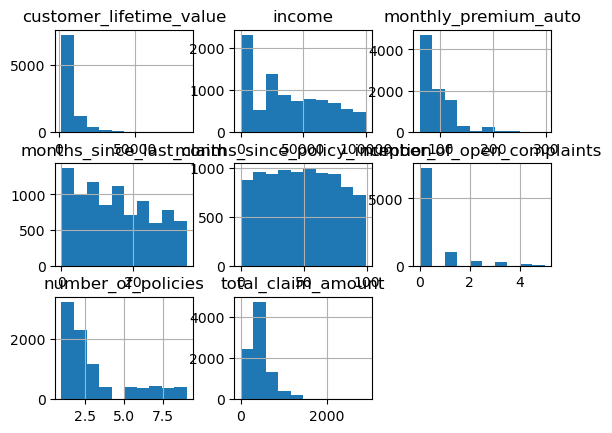

In [485]:
numerical_df.hist()

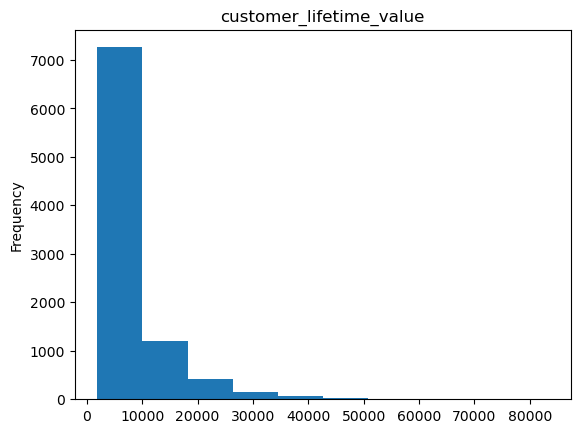

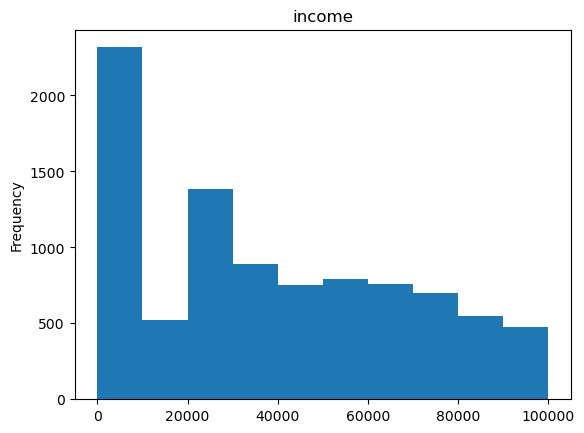

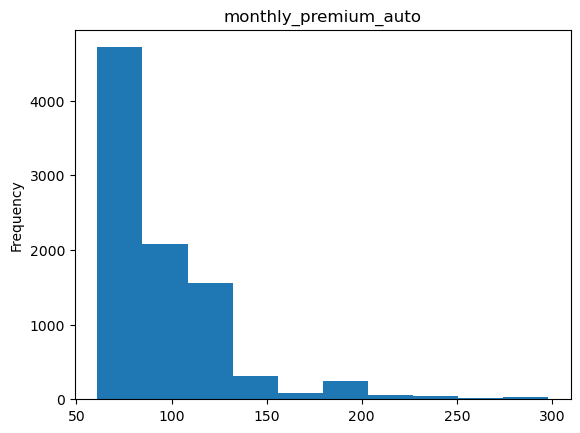

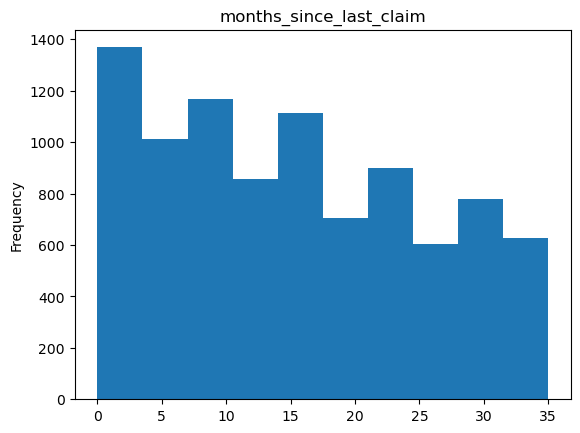

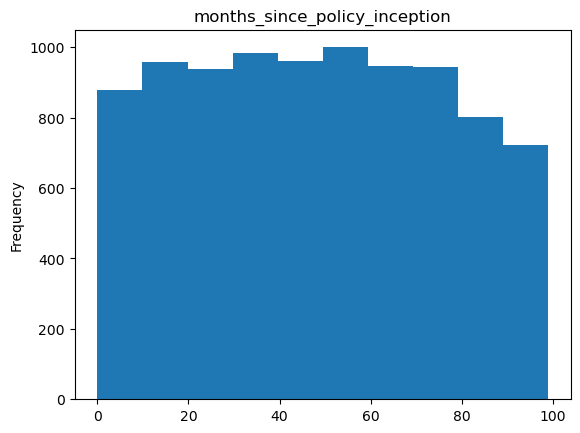

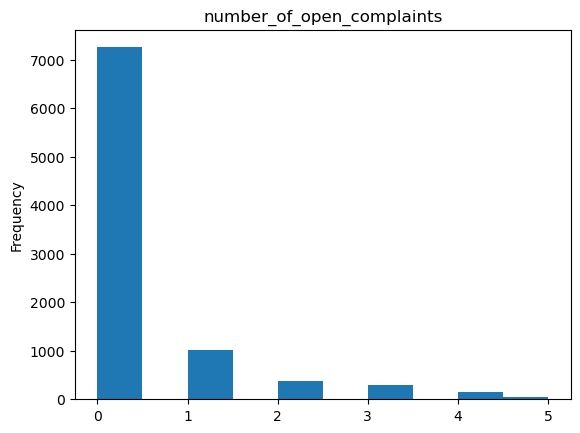

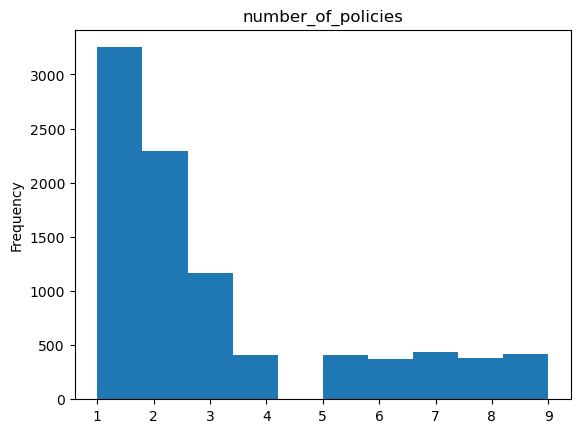

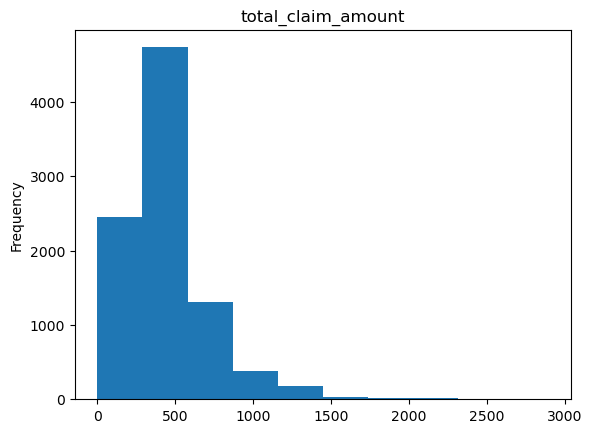

In [508]:
for col in numerical_df.columns:
    numerical_df[col].plot(kind='hist')
   
    plt.title(col)
    plt.show()
          

In [ ]:
# there is no normal distribution, most of them are exponential. Months_since_policy_inception looks like an uniform distribution

In [ ]:
# not sure if it is the best solution, but i made a log transform of (x+1) instead of x, trying to avoid "inf" on number_of_open_complaints

In [522]:
numlog_df = numerical_df.apply(lambda x:np.log10(x+1))
numlog_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,3.441620,4.750316,1.845098,1.518514,0.778151,0.00000,0.301030,2.586375
1,3.843889,0.000000,1.977724,1.146128,1.633468,0.00000,0.954243,3.054025
2,4.110200,4.688135,2.037426,1.278754,1.591065,0.00000,0.477121,2.753945
3,3.883483,0.000000,2.029384,1.278754,1.819544,0.00000,0.903090,2.724997
4,3.449431,4.641841,1.869232,1.113943,1.653213,0.00000,0.301030,2.143424
...,...,...,...,...,...,...,...,...
9129,4.369346,4.856983,1.869232,1.278754,1.954243,0.00000,0.477121,2.299365
9130,3.491013,4.334554,1.903090,1.176091,1.462398,0.00000,0.301030,2.580012
9131,3.911950,0.000000,1.934498,1.000000,1.579784,0.60206,0.477121,2.898607
9132,3.876532,4.341276,1.986772,1.544068,0.602060,0.00000,0.602060,2.840232


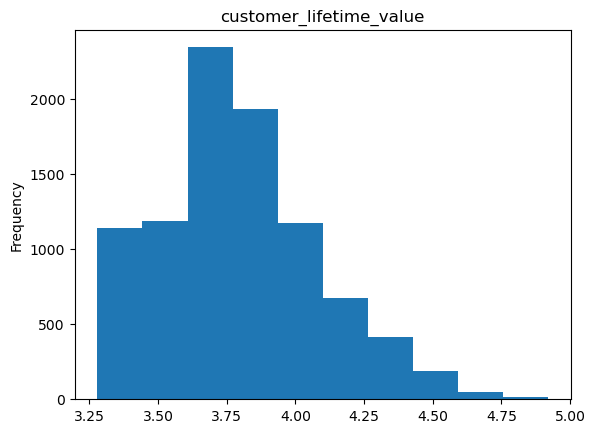

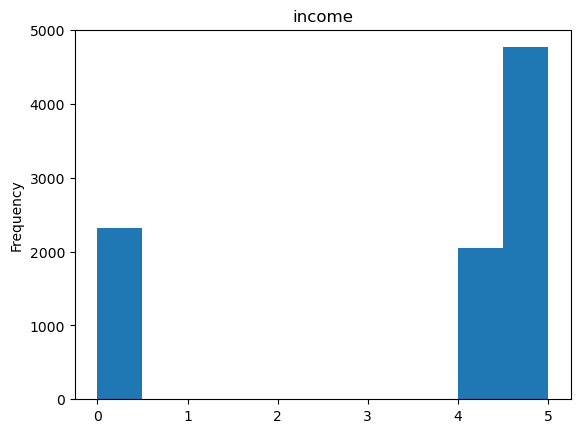

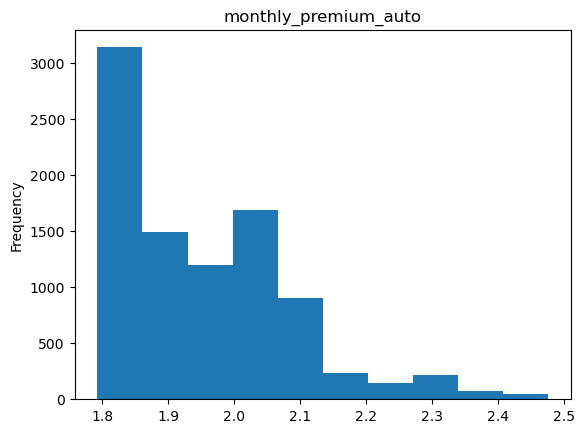

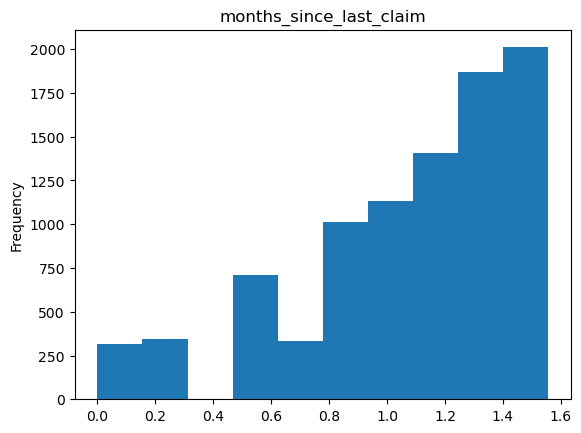

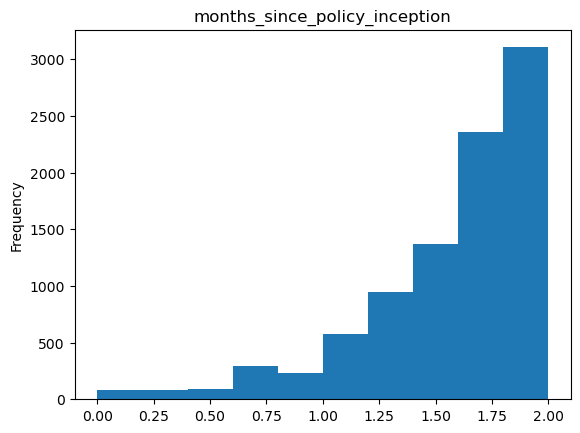

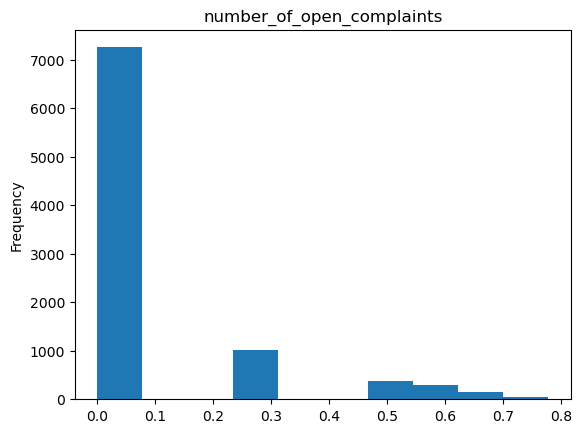

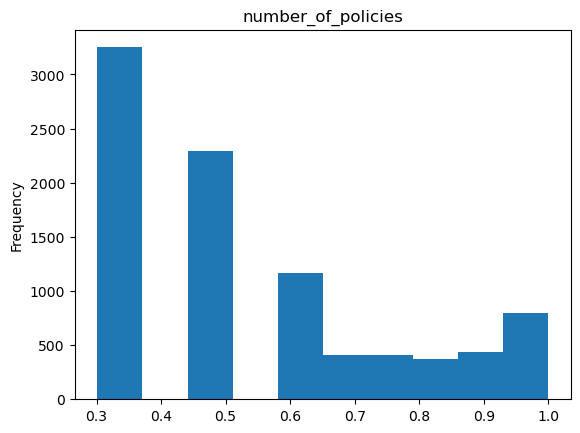

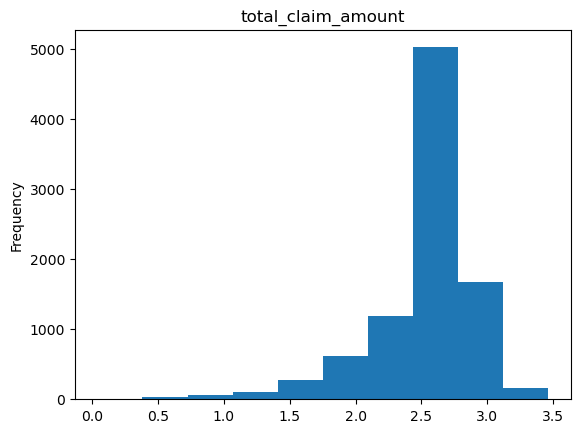

In [523]:
for col in numlog_df.columns:
    numlog_df[col].plot(kind='hist')
   
    plt.title(col)
    plt.show()

In [526]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numerical_df) # we will reuse this transformer for X_test later
numerical_df_arr = transformer.transform(numerical_df)
numerical_df_scaled = pd.DataFrame(numerical_df_arr, columns=numerical_df.columns)
numerical_df_scaled.head()



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


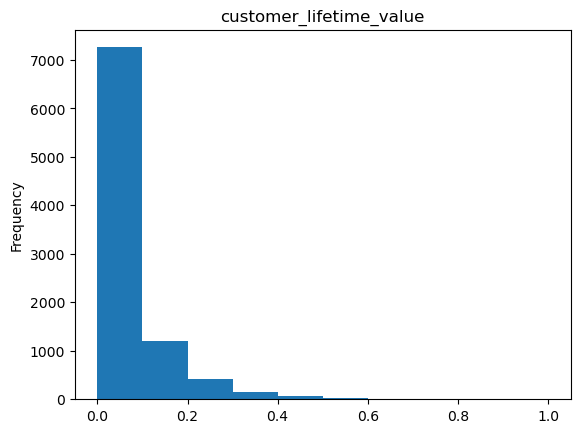

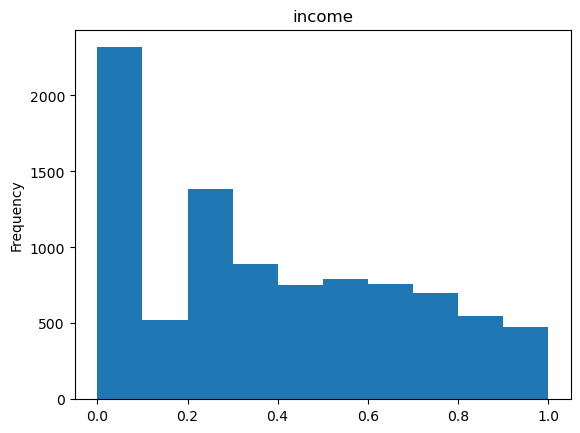

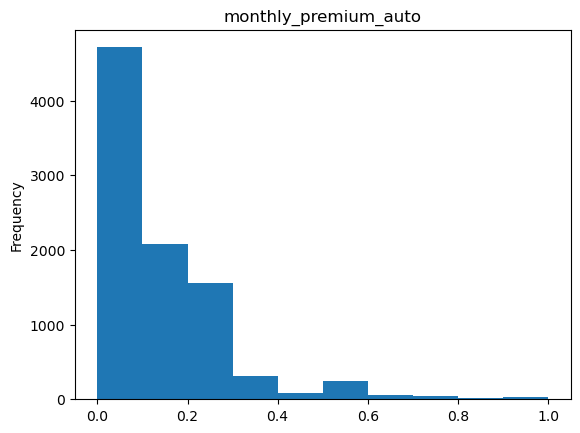

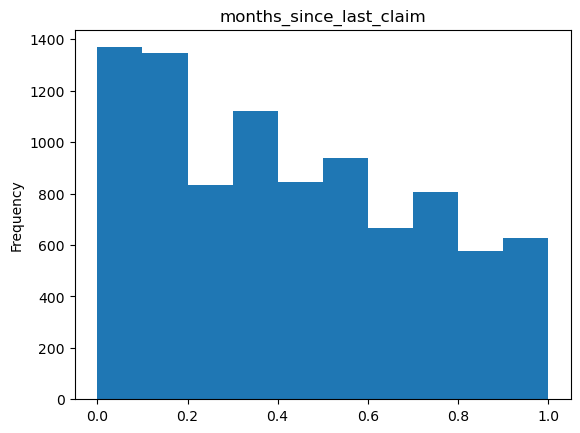

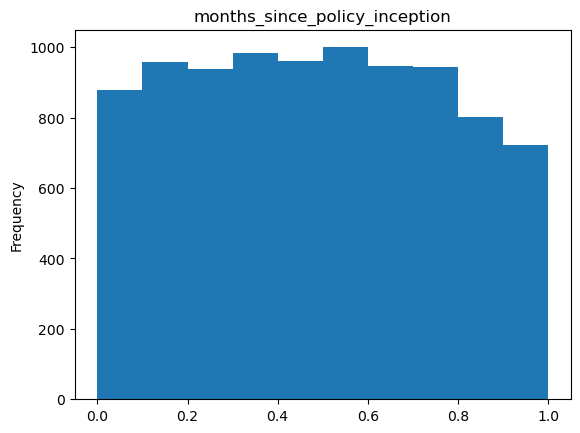

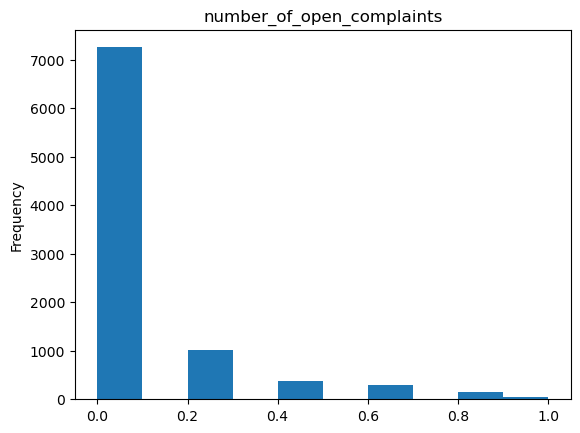

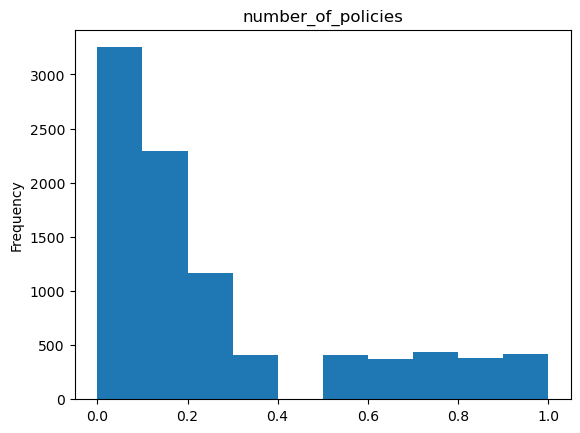

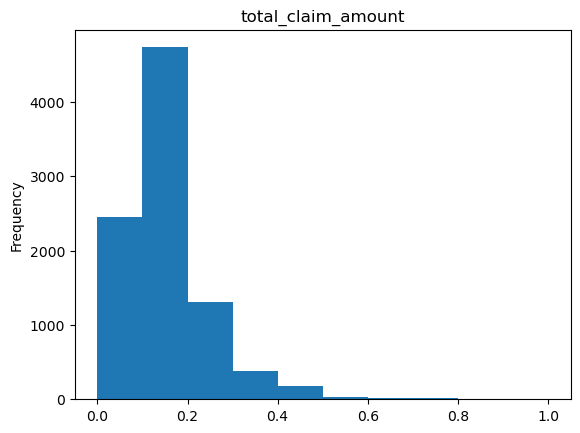

In [527]:
for col in numerical_df_scaled.columns:
    numerical_df_scaled[col].plot(kind='hist')
   
    plt.title(col)
    plt.show()

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>, <Axes: >]],
      dtype=object)

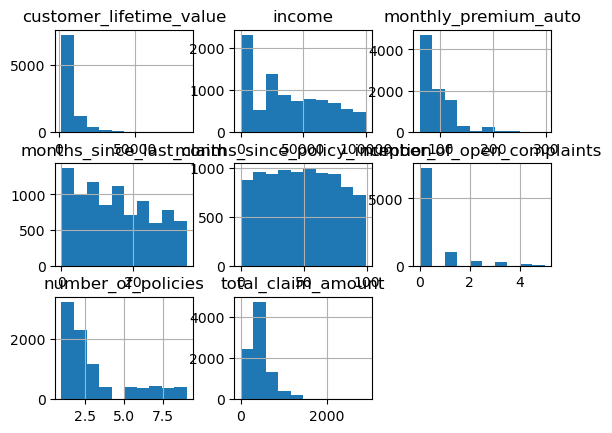

In [528]:
numerical_df.hist()

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>, <Axes: >]],
      dtype=object)

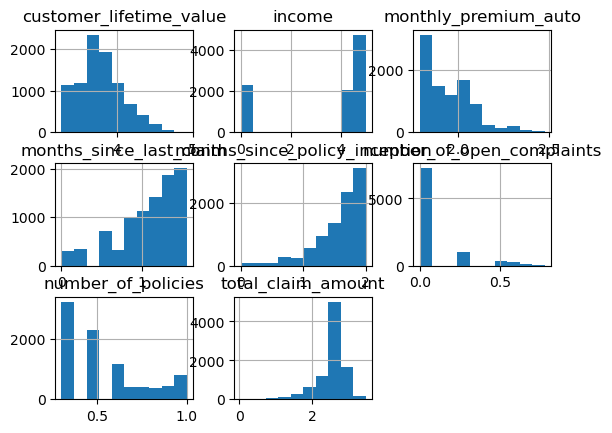

In [529]:
numlog_df.hist()

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>, <Axes: >]],
      dtype=object)

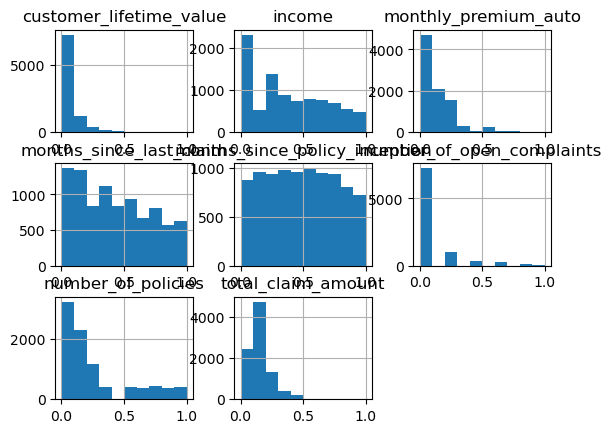

In [530]:
numerical_df_scaled.hist()

In [ ]:
#  after the min max scaler, the plots don't change. The log-transform is changing the graph